In [6]:
from pandas import read_csv
from matplotlib import pyplot
%matplotlib inline
from numpy import *

series = read_csv('pse_load.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())

index
2015-01-01 01:00:00    15557.138
2015-01-01 02:00:00    14727.413
2015-01-01 03:00:00    13979.463
2015-01-01 04:00:00    13453.775
2015-01-01 05:00:00    13306.000
Name: Electricity load [MW], dtype: float64


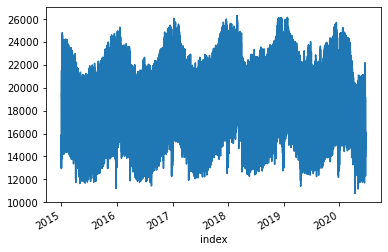

In [7]:
series.plot()
pyplot.show()

In [8]:
from numpy.fft import fftfreq
from scipy.fftpack import *

In [9]:
subseries = series[:8754] 
load = series[:].tolist()
date = series.index

N = len(date)
dt = (date[1]-date[0])

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(load) 

# calculate the frequencies for the components in F
w = fftfreq(N, 1./8754)

In [10]:
indices = where(w > 0) # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

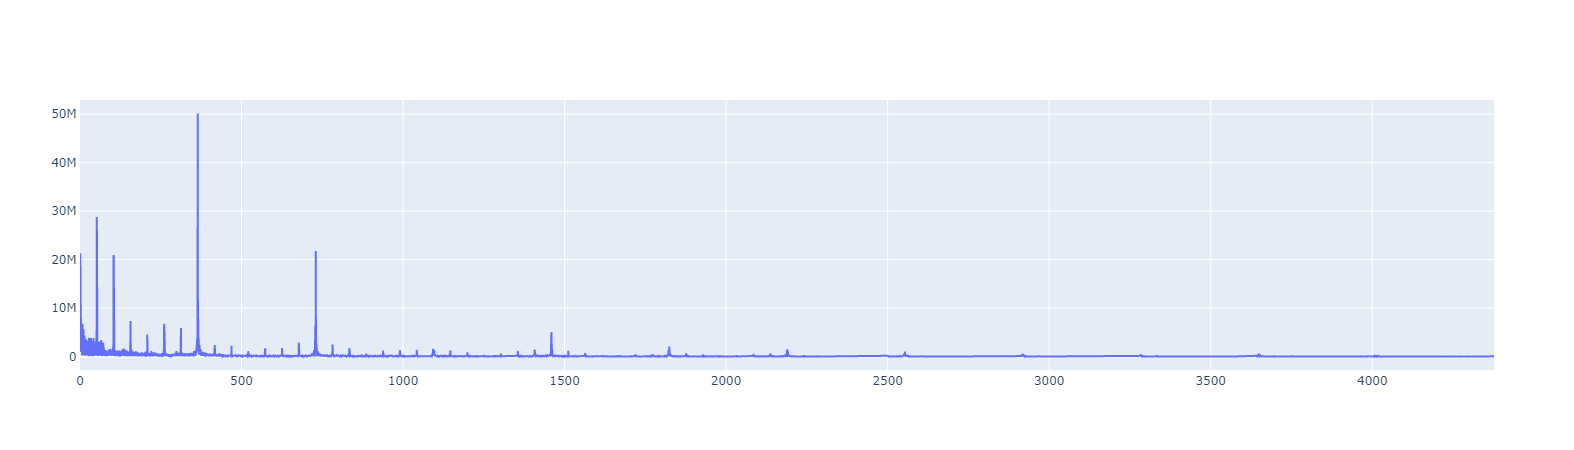

In [11]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(x=w_pos, y=abs(F_pos)))
fig.show()
